A tutorial for Kaggle's Titanic: Machine Learning from Disaster competition. Demonstartes basic data munging, analysis, and visualization techniques. Shows examples of supervised machine learning techniques.
https://www.kaggle.com/c/titanic

The dataset used here is downloaded from https://blog.socialcops.com/engineering/machine-learning-python/.

**The column heading variables have the following meanings:**

* survival: Survival (0 = no; 1 = yes)
* class: Passenger class (1 = first; 2 = second; 3 = third)
* name: Name
* sex: Sex
* age: Age
* sibsp: Number of siblings/spouses aboard
* parch: Number of parents/children aboard
* ticket: Ticket number
* fare: Passenger fare
* cabin: Cabin
* embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat: Lifeboat (if survived)
* body: Body number (if did not survive and body was recovered)

In [1]:
# Numpy is good for math involving matrices and arrays
import numpy as np
# Pandas is good for working with dataframes and series (like Excel)
import pandas as pd

### Read in the data found in `titanic3.xls`
* Use pandas
* Show only the head of the dataframe
* How many rows and columns are in this dataframe?

In [2]:
# A pandas dataframe Python's super charged version of the workflow in an Excel table
df = pd.read_excel('../1.Titanic/Data/titanic3.xls')

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [5]:
df.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
799,3,0,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S,NaN,NaN,NaN
596,2,1,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.0000,NaN,S,9,NaN,"London, England"
632,3,0,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN"
1125,3,0,"Petersen, Mr. Marius",male,24.0,0,0,342441,8.0500,NaN,S,NaN,NaN,NaN
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN


In [6]:
# We have 1309 observations/passengers to analyze (1309 entries, 0 to 1309) and 14 features
df.shape

(1309, 14)

### Get the column names and data types for the `titanic` table

In [7]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


### Summarize the `survived` column
Now that we have the data in a dataframe, we can begin an advanced analysis of the data using powerful single-line Pandas functions. First, let’s examine the overall chance of survival for a Titanic passenger.

In [9]:
df['survived'].mean()
# The calculation shows that only 38% of the passengers survived

0.3819709702062643

Social classes were heavily stratified in the early twentieth century. This was especially true on the Titanic, where the luxurious first-class areas were completely off limits to the middle-class passengers in second class, and especially to those who carried a third class “economy price” ticket. To get a view into the composition of each class, we can group data by class, and view the averages for each column:

In [10]:
# Use `groupby`
df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


We can start drawing some interesting insights from this data. For instance, passengers in first class had a 62% chance of survival, compared to a 25.5% chance for those in 3rd class. Additionally, the lower classes generally consisted of younger people, and the ticket prices for first class were predictably much higher than those for second and third class. The average ticket price for first class (£87.5) is equivalent to $13,487 in 2016.

In [11]:
class_sex_grouping = df.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

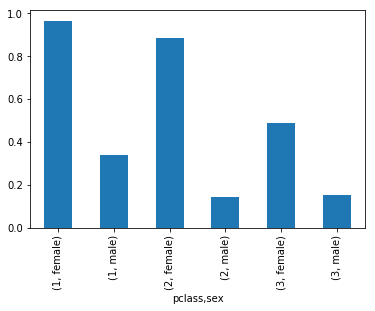

In [13]:
class_sex_grouping['survived'].plot.bar()

While the Titanic was sinking, the officers famously prioritized who was allowed in a lifeboat with the strict maritime tradition of evacuating women and children first. Our statistical results clearly reflect the first part of this policy as, across all classes, women were much more likely to survive than the men. We can also see that the women were younger than the men on average, were more likely to be traveling with family, and paid slightly more for their tickets.

The effectiveness of the second part of this “Women and children first” policy can be deduced by breaking down the survival rate by age.

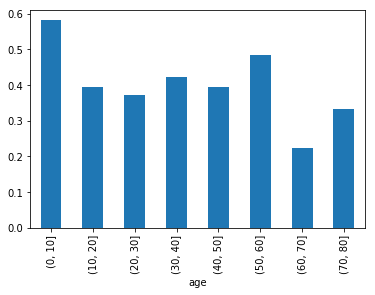

In [14]:
group_by_age = pd.cut(df["age"], np.arange(0, 90, 10))
age_grouping = df.groupby(group_by_age).mean()
age_grouping['survived'].plot.bar()

# Children were indeed the most likely age group to survive, although this percentage was still tragically below 60%.

### Calculate the survival rate by sex only

Remember to hit shift+tab to read the documentation for command options

In [15]:
df.groupby('sex')['survived'].sum()

sex
female    339
male      161
Name: survived, dtype: int64

In [16]:
# Turn this into a pandas dataframe
pd.DataFrame(df.groupby('sex')['survived'].sum())

,survived
sex,
female,339
male,161


Add a column called `Survival Rate` to the pandas dataframe

In [17]:
summary = pd.DataFrame(df.groupby('sex')['survived'].sum())

In [18]:
df.shape

(1309, 14)

In [19]:
summary['survival_rate'] = summary['survived'].sum()/1306

In [20]:
summary

,survived,survival_rate
sex,,
female,339,0.382848
male,161,0.382848


In [21]:
round(summary['survived'].sum()/1306, 2)

0.38

In [22]:
summary['survival_rate'] = round(summary['survived'].sum()/1306, 2)

In [23]:
summary['survival_rate'] = (str(round(summary['survived'].sum()/1306, 2))+"%")[2:]
summary

,survived,survival_rate
sex,,
female,339,38%
male,161,38%


# Preparing The Data
Before we can feed our data set into a machine learning algorithm, we have to remove missing values and split it into training and test sets.  

If we perform a count of each column, we will see that much of the data on certain fields is missing. Most machine learning algorithms will have a difficult time handling missing values, so we will need to make sure that each row has a value for each column.

### Handling NaNs

In [24]:
# Display number of null rows per column
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

The features `cabin` has many missing values and therefore can’t add much value to our analysis. To handle this, let's drop them from the dataframe to preserve the integrity of our dataset. We also don't need `tickte`, `boat`, `body` or `home.dest`. We don't need `name`, but we can use it as our index instead.

In [25]:
# Before dropping columns, check the shape/size of your dataset
df.shape

(1309, 14)

In [26]:
df.drop(['cabin'], axis=1) 
df.shape

(1309, 14)

In [27]:
# It only saves if you (re)assign it to a variable
df = df.drop(['cabin'], axis=1)

In [28]:
df.shape

(1309, 13)

In [29]:
df = df.drop(['ticket'], axis=1)
df = df.drop(['boat'], axis=1)
df = df.drop(['body'], axis=1)
df = df.drop(['home.dest'], axis=1)

In [30]:
df.shape

(1309, 9)

### Make the name column the index of the DataFrame

In [31]:
df = df.set_index('name')

In [32]:
df.shape

(1309, 8)

In [33]:
df.isnull().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

The feature `Age` has less missing values and we feel like it might be a significant feature, so instead of dropping it from our dataset completely, let's fill the NaN values with the mean.

In [34]:
# What is the mean for Age?
df['age'].mean()

29.8811345124283

In [35]:
# What is the median for Age?
df['age'].median()

28.0

In [36]:
# What is the mode for Age?
df['age'].mode()

0    24.0
dtype: float64

In [37]:
# Another way to find this information
df['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [38]:
pd.DataFrame(df['age'].describe())

,age
count,1046.000000
mean,29.881135
std,14.413500
min,0.166700
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [39]:
# Fill NaN values with the mean
age_mean = df['age'].mean()
age_mean

29.8811345124283

In [40]:
df['age'][:20]

name
Allen, Miss. Elisabeth Walton                        29.0000
Allison, Master. Hudson Trevor                        0.9167
Allison, Miss. Helen Loraine                          2.0000
Allison, Mr. Hudson Joshua Creighton                 30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)      25.0000
Anderson, Mr. Harry                                  48.0000
Andrews, Miss. Kornelia Theodosia                    63.0000
Andrews, Mr. Thomas Jr                               39.0000
Appleton, Mrs. Edward Dale (Charlotte Lamson)        53.0000
Artagaveytia, Mr. Ramon                              71.0000
Astor, Col. John Jacob                               47.0000
Astor, Mrs. John Jacob (Madeleine Talmadge Force)    18.0000
Aubart, Mme. Leontine Pauline                        24.0000
Barber, Miss. Ellen "Nellie"                         26.0000
Barkworth, Mr. Algernon Henry Wilson                 80.0000
Baumann, Mr. John D                                      NaN
Baxter, Mr. Quigg E

In [41]:
df['age']['Baumann, Mr. John D']

nan

In [42]:
df['age'].fillna(age_mean, inplace=True)
df['age']['Baumann, Mr. John D']

29.8811345124283

In [43]:
df.shape

(1309, 8)

In [44]:
# Fill embarked with the mode using np.where
np.where(df['embarked'].isnull())

(array([168, 284]),)

In [45]:
df['embarked'][168]

nan

In [46]:
df = df.dropna(subset=['embarked'], how='any')

In [47]:
df.shape

(1307, 8)

In [48]:
# Verify that there are no remaining null values
df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    0
dtype: int64

In [49]:
# Repeat with `fare`
df = df.dropna(subset=['fare'], how='any')
df.shape

(1306, 8)

### Calculate the mean for the following columns grouped by survival

Make sure you round to two decimal places:

- `pclass`
- `age`
- `sibsp`
- `parch`
- `fare`

In [50]:
df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [51]:
pd.DataFrame(pd.pivot_table(df, values=['pclass', 'age', 'sibsp', 'parch', 'fare'], columns=['survived']))

survived,0,1
age,30.352103,28.974711
fare,23.353831,49.238136
parch,0.329208,0.477912
pclass,2.500000,1.965863
sibsp,0.522277,0.463855


In [52]:
pd.DataFrame(pd.pivot_table(df, values=['pclass', 'age', 'sibsp', 'parch', 'fare'], columns=['survived'])).T

,age,fare,parch,pclass,sibsp
survived,,,,,
0,30.352103,23.353831,0.329208,2.500000,0.522277
1,28.974711,49.238136,0.477912,1.965863,0.463855


### Export your cleaned data

In [53]:
pd.to_pickle(df, '../1.Titanic/Data/df.pickle')